# **1-Introduction to XGBoost (Extreme Gradient Boosting)**[1]
XGBoost is one of the most popular machine learning algorithm these days. Regardless of the type of prediction task at hand; regression or classification.
it has become the "state-of-the-art” machine learning algorithm to deal with structured data.

XGBoost (Extreme Gradient Boosting) belongs to a family of boosting algorithms and uses the gradient boosting (GBM) framework at its core. It is an optimized distributed gradient boosting library. But wait, what is boosting? Well, keep on reading.



#**2-Boosting**
Boosting is a sequential technique which works on the principle of an ensemble. It combines a set of weak learners and delivers improved prediction accuracy. At any instant t, the model outcomes are weighed based on the outcomes of previous instant t-1. The outcomes predicted correctly are given a lower weight and the ones miss-classified are weighted higher. Note that a weak learner is one which is slightly better than random guessing. For example, a decision tree whose predictions are slightly better than 50%. Let's understand boosting in general with a simple illustration.

Four classifiers (in 4 boxes), shown above, are trying to classify + and - classes as homogeneously as possible.

1. Box 1: The first classifier (usually a decision stump) creates a vertical line (split) at D1. It says anything to the left of D1 is + and anything to the right of D1 is -. However, this classifier misclassifies three + points.

Note a Decision Stump is a Decision Tree model that only splits off at one level, therefore the final prediction is based on only one feature.

2. Box 2: The second classifier gives more weight to the three + misclassified points (see the bigger size of +) and creates a vertical line at D2. Again it says, anything to the right of D2 is - and left is +. Still, it makes mistakes by incorrectly classifying three - points.

3. Box 3: Again, the third classifier gives more weight to the three - misclassified points and creates a horizontal line at D3. Still, this classifier fails to classify the points (in the circles) correctly.

4. Box 4: This is a weighted combination of the weak classifiers (Box 1,2 and 3). As you can see, it does a good job at classifying all the points correctly.

That's the basic idea behind boosting algorithms is building a weak model, making conclusions about the various feature importance and parameters, and then using those conclusions to build a new, stronger model and capitalize on the misclassification error of the previous model and try to reduce it. Now, let's come to XGBoost. To begin with, you should know about the default base learners of XGBoost: tree ensembles. The tree ensemble model is a set of classification and regression trees (CART). Trees are grown one after another ,and attempts to reduce the misclassification rate are made in subsequent iterations. Here’s a simple example of a CART that classifies whether someone will like computer games straight from the XGBoost's documentation.

#**3- Problem**

In this tutorial, you will be using XGBoost to solve a regression problem. The dataset is taken from the UCI Machine Learning Repository and is also present in sklearn's datasets module. It has 14 explanatory variables describing various aspects of residential homes in Boston, the challenge is to predict the median value of owner-occupied homes per $1000s.

First of all, just like what you do with any other dataset, you are going to import the Boston Housing dataset and store it in a variable called boston. To import it from scikit-learn you will need to run this snippet.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()

The boston variable itself is a dictionary, so you can check for its keys using the .keys() method

In [ ]:
print(boston.keys())

You can easily check for its shape by using the boston.data.shape attribute, which will return the size of the dataset.

In [ ]:
print(boston.data.shape)

As you can see it returned (506, 13), that means there are 506 rows of data with 13 columns. Now, if you want to know what the 13 columns are, you can simply use the .feature_names attribute and it will return the feature names.

In [ ]:
print(boston.feature_names)

The description of the dataset is available in the dataset itself. You can take a look at it using .DESCR.

In [ ]:
print(boston.DESCR)

Now let’s convert it into a pandas DataFrame! For that you need to import the pandas library and call the DataFrame() function passing the argument boston.data. To label the names of the columns, use the .columnns attribute of the pandas DataFrame and assign it to boston.feature_names.

In [5]:
import pandas as pd
data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

Explore the top 5 rows of the dataset by using head() method on your pandas DataFrame.



In [ ]:
data.head()

You'll notice that there is no column called PRICE in the DataFrame. This is because the target column is available in another attribute called boston.target. Append boston.target to your pandas DataFrame.

In [8]:
data['PRICE'] = boston.target

Run the .info() method on your DataFrame to get useful information about the data.



In [ ]:
data.info()

Turns out that this dataset has 14 columns (including the target variable PRICE) and 506 rows. Notice that the columns are of float data-type indicating the presence of only continuous features with no missing values in any of the columns. To get more summary statistics of the different features in the dataset you will use the describe() method on your DataFrame.

Note that describe() only gives summary statistics of columns which are continuous in nature and not categorical.

In [ ]:
data.describe()

If you plan to use XGBoost on a dataset which has categorical features you may want to consider applying some encoding (like one-hot encoding) to such features before training the model. Also, if you have some missing values such as NA in the dataset you may or may not do a separate treatment for them, because XGBoost is capable of handling missing values internally. You can check out this link if you wish to know more on this.

Without delving into more exploratory analysis and feature engineering, you will now focus on applying the algorithm to train the model on this data.

You will build the model using Trees as base learners (which are the default base learners) using XGBoost's scikit-learn compatible API. Along the way, you will also learn some of the common tuning parameters which XGBoost provides in order to improve the model's performance, and using the root mean squared error (RMSE) performance metric to check the performance of the trained model on the test set. Root mean Squared error is the square root of the mean of the squared differences between the actual and the predicted values. As usual, you start by importing the library xgboost and other important libraries that you will be using for building the model.

Note you can install python libraries like xgboost on your system using pip install xgboost on cmd.

In [7]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

Separate the target variable and rest of the variables using .iloc to subset the data.



In [8]:
X, y = data.iloc[:,:-1],data.iloc[:,-1]


Now you will convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains. You will use this later in the tutorial.

In [9]:
data_dmatrix = xgb.DMatrix(data=X,label=y)


#**4-XGBoost's hyperparameters**

At this point, before building the model, you should be aware of the tuning parameters that XGBoost provides. Well, there are a plethora of tuning parameters for tree-based learners in XGBoost and you can read all about them here. But the most common ones that you should know are:

- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- max_depth: determines how deeply each tree is allowed to grow during any boosting round.
- ubsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.
- n_estimators: number of trees you want to build.
objective: determines the loss function to be used like reg:linear for regression problems, reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.
XGBoost also supports regularization parameters to penalize models as they become more complex and reduce them to simple (parsimonious) models.

- gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.
- alpha: L1 regularization on leaf weights. A large value leads to more regularization.
- lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

It's also worth mentioning that though you are using trees as your base learners, you can also use XGBoost's relatively less popular linear base learners and one other tree learner known as dart. All you have to do is set the booster parameter to either gbtree (default),gblinear or dart.

Now, you will create the train and test set for cross-validation of the results using the train_test_split function from sklearn's model_selection module with test_size size equal to 20% of the data. Also, to maintain reproducibility of the results, a random_state is also assigned.


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

The next step is to instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the hyper-parameters passed as arguments. For classification problems, you would have used the XGBClassifier() class.

In [11]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

Fit the regressor to the training set and make predictions on the test set using the familiar .fit() and .predict() methods.

In [ ]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

Compute the rmse by invoking the mean_sqaured_error function from sklearn's metrics module.

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

Well, you can see that your RMSE for the price prediction came out to be around 10.8 per 1000$.


#**5-k-fold Cross Validation using XGBoost**

In order to build more robust models, it is common to do a k-fold cross validation where all the entries in the original training dataset are used for both training as well as validation. Also, each entry is used for validation just once. XGBoost supports k-fold cross validation via the cv() method. All you have to do is specify the nfolds parameter, which is the number of cross validation sets you want to build. Also, it supports many other parameters (check out this link) like:

- num_boost_round: denotes the number of trees you build (analogous to n_estimators)
- metrics: tells the evaluation metrics to be watched during CV
- as_pandas: to return the results in a pandas DataFrame.
- early_stopping_rounds: finishes training of the model early if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.
- seed: for reproducibility of results.

This time you will create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

You will use these parameters to build a 3-fold cross validation model by invoking XGBoost's cv() method and store the results in a cv_results DataFrame. Note that here you are using the Dmatrix object you created before.

In [ ]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

cv_results contains train and test RMSE metrics for each boosting round.


In [ ]:
cv_results.head()

Extract and print the final boosting round metric.

In [16]:
print((cv_results["test-rmse-mean"]).tail(1))

49    3.995757
Name: test-rmse-mean, dtype: float64


You can see that your RMSE for the price prediction has reduced as compared to last time and came out to be around 4.03 per 1000$. You can reach an even lower RMSE for a different set of hyper-parameters. You may consider applying techniques like Grid Search, Random Search and Bayesian Optimization to reach the optimal set of hyper-parameters.

#**5-Visualize Boosting Trees and Feature Importance**

You can also visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset. XGBoost has a plot_tree() function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the plot_tree() function along with the number of trees you want to plot using the num_trees argument.

In [ ]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

Plotting the first tree with the matplotlib library:



In [ ]:
import matplotlib.pyplot as plt
xgb.plot_tree(xg_reg,num_trees=0)
plt.rcParams['figure.figsize'] = [100, 10]
plt.show()

These plots provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions.

Note that if the above plot throws the 'graphviz' error on your system, consider installing the graphviz package via pip install graphviz on cmd. You may also need to run sudo apt-get install graphviz on cmd. (link)

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a plot_importance() function that allows you to do exactly this.

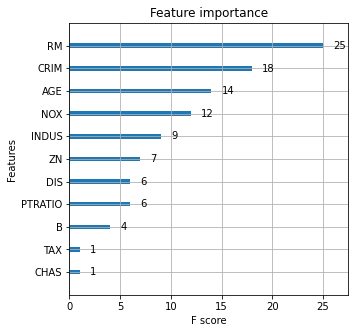

In [28]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [50, 5]
plt.show()

#**References**

[[1]Using XGBoost in Python](https://www.datacamp.com/community/tutorials/xgboost-in-python)